Scipy permet de Faire du calcul Scientifique
1) interpolation
2) optimisation
3) traitement du signal
4) tranformée de fourier
5) image processing

In [24]:
# algèbre linéaire et statistiques -> on avait déjà fait avec numpy mais à refaire ici plus tard
# module interpolate
# création de données simple avec matplotlib

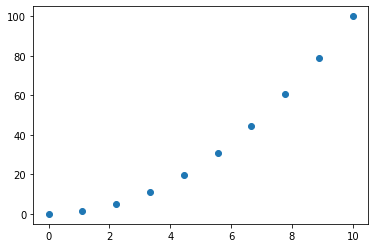

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

In [26]:
# Pour interpoler -> placer plus depoints entre nos différents points bleu

In [27]:
from scipy.interpolate import interp1d

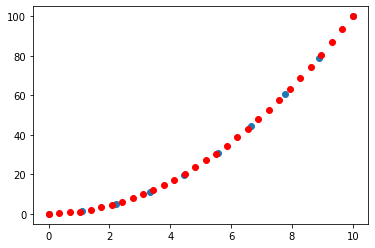

In [28]:
# cette fonction permet de faire appel à une autre fonction
# voici une fct f dont on dispose et que l'on peut utiliser comme on veut
f = interp1d(x, y, kind='linear')
# créer un nouvel axe x avec 30points
new_x = np.linspace(0, 10, 30)
# on va faire passer new_x dans f et on va mettre ca dans tableau numpy qui va contenir nos points qu'on veut mettre sur graphe
result = f(new_x)
# afficher avec matplotlib
plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

In [29]:
# Attention que l'interpolation ne cache pas ce qui se passe dans la réalité

In [30]:
# il existe plusieur type d'interpolation -> cubic -> quadrztic -> voir doc scipy

Module Optimize

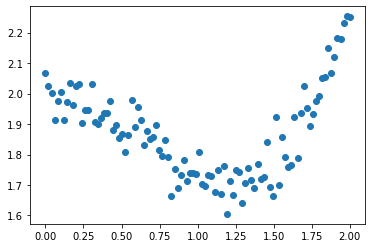

In [31]:
# qui dit optimisation dit minimisation le plus souvent
# nouveau dataset
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [32]:
# y est un polynome de degré3 -> 1/3*x**3 - 3/5*x**2 + 2
# avec du bruit -> + np.random.randn(x.shape[0])/20
# Développer un modèle statistique qui rentre parfaitement bien dans notre modèle
# on pourrait créer une fct des moindres carré qui évolue sur un modèle de base pour ce rapprocher de celui ci

In [33]:
def f(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [34]:
from scipy import optimize

In [35]:
# avec le module optimize de scipy on utilise la fct curve_fit
optimize.curve_fit(f, x, y)

(array([ 0.37653332, -0.72056806,  0.08607558,  1.98915366]),
 array([[ 0.00114023, -0.0034207 ,  0.00272283, -0.00044237],
        [-0.0034207 ,  0.01056099, -0.00876627,  0.00152434],
        [ 0.00272283, -0.00876627,  0.00777886, -0.00153213],
        [-0.00044237,  0.00152434, -0.00153213,  0.00041072]]))

In [36]:
# on obtient 2 tableaux
# le 1er -> les différents paramètres a, b, c, d de notre modèle
# le 2eme -> matrice de covariances entre ces paramètres de notre modèle

In [37]:
# enregistrons ces deux tableaux dans des variables
param, param_cov = optimize.curve_fit(f, x, y)

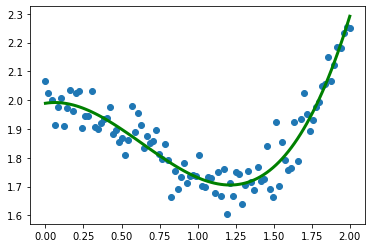

In [38]:
plt.scatter(x, y)
plt.plot(x, f(x, param[0], param[1], param[2], param[3]), c='g', lw=3)

In [39]:
# On peut faire ça avec scikit learn -> et oui c'est mieux ici c'était juste pour apprendre

In [40]:
# Nouvelle fct math
def f(x):
    return x**2 + 15*np.sin(x)

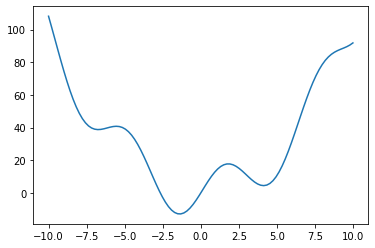

In [42]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [43]:
# plusieurs minimum -> quelle méthode ?
# algo de minimisation -> methode de newton ou descente de gradient
optimize.minimize(f, x0=-8)

      fun: 38.81120617595851
 hess_inv: array([[0.11637184]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.73789948])

In [44]:
# ce qui nous intéresse c'est le x tout à  la fin -> x = -6.73789
# coordonnée x du min -> mais ça c'est min local et nous on veut le global 
# soit changer algo ou prendre un autre point -> ce qu'on va faire ici
optimize.minimize(f, x0=-5)

      fun: -12.823616887804414
 hess_inv: array([[0.05978678]])
      jac: array([3.69548798e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.38505583])

In [49]:
# ok cette valeur de x = -1.385 correspond à notre min global
# pour accéder à cette valeur on ajoute un .x à la ligne de code précédente
x0=-5
result = optimize.minimize(f, x0=x0).x

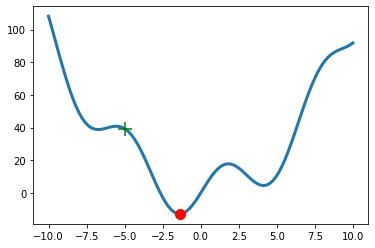

In [50]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)

In [53]:
# on peut aussi l'utiliser avec des graphes à plusieurs dimensions
# exemple graphe  2 dimensions
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

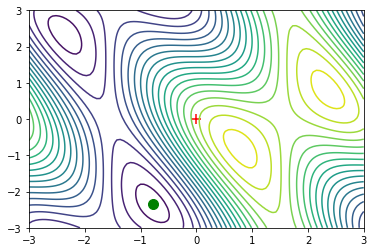

In [56]:
# on définit les axes
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

# on définit le type de graphe avec contourplot
x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)

# on prend un x0 au hasard pour après laisser trzvailler le modèle
x0 = np.zeros((2, 1))
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100) 

# on laisse travialler le modèle et on stock la réponse -> .x dans variable result
result = optimize.minimize(f, x0=x0).x

# afficher la coordonnée avec matplotlib
plt.scatter(result[0], result[1], c='g', s=100) 

Traitement du signal

In [57]:
# plusieurs possibilités site matplotlib -> signal processing
# plusieurs possibilités site matplotlib -> discrete transform fourier

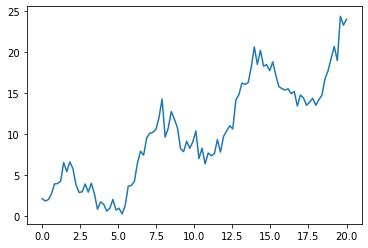

In [58]:
# signal processing -> fct dtrend() -> permet d'éliminer toute tendance linéaire
# let's create a graphe
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [59]:
from scipy import signal

In [60]:
new_y = signal.detrend(y)

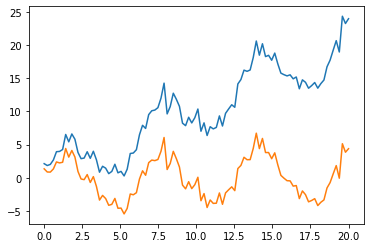

In [61]:
plt.plot(x, y)
plt.plot(x, new_y)

In [62]:
# on a éliminer le signal linéaire qu'on avait sur la courbe bleu 

Traitement du signal -> transformation de Fourier

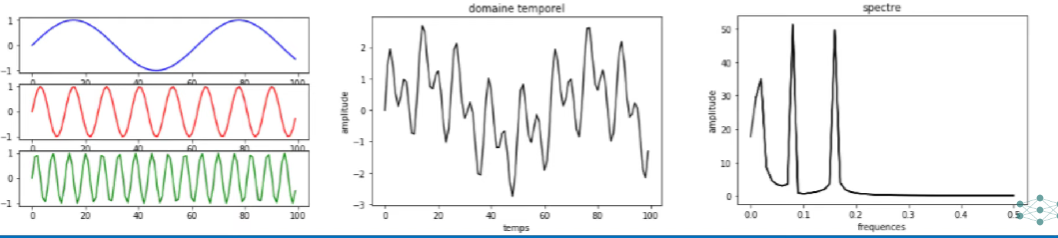

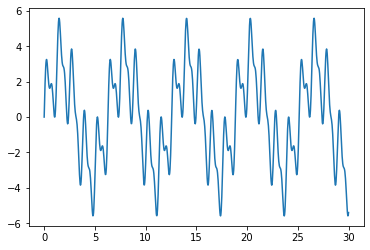

In [63]:
# générons un signal périodique pour travailler
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [64]:
# on importe le module fftpack
from scipy import fftpack 

C:\Users\Geoffrey\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


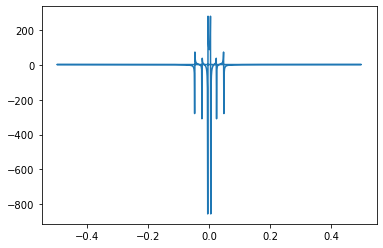

In [67]:
#créer un variable Fourier et variable fréquences
fourier = fftpack.fft(y)
freq = fftpack.fftfreq(y.size)
plt.plot(freq, fourier)


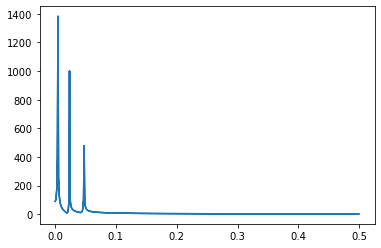

In [68]:
# quand on utilise ces fct on a des frequences négatives et des amplitudes négatives
# => filtrer tout ça en prenant les valeurs absolues
fourier = fftpack.fft(y)
power = np.abs(fourier)
freq = fftpack.fftfreq(y.size)
plt.plot(np.abs(freq), power)

In [69]:
# Application de ce qu'on vient de faire

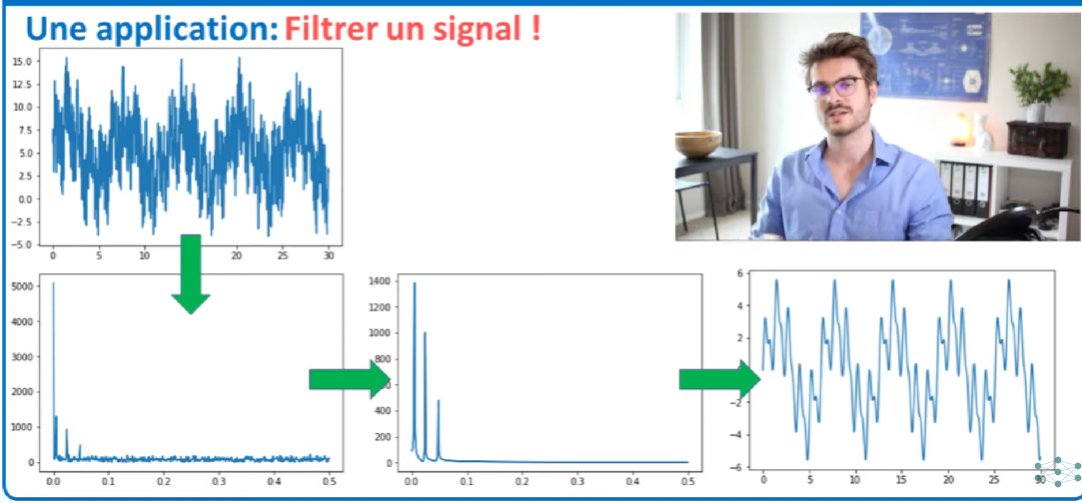

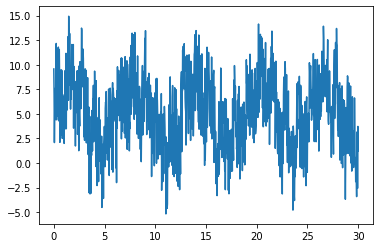

In [89]:
# Au boulot
# générons un signal périodique pour travailler (le même qu'avant) mais avec beaucoup de bruits cette fois
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

In [90]:
from scipy import fftpack

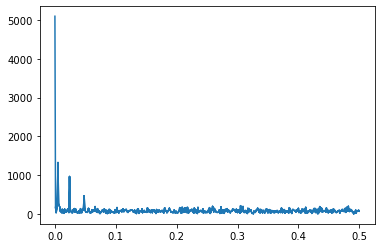

In [91]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
freq = fftpack.fftfreq(y.size)
plt.plot(np.abs(freq), power)

In [92]:
# maintenant il faut filtrer ce spectre
# on va dire que la variable fourier est égale à 0 pour toutes les valeurs d'un certain seuil
fourier[power<400] = 0

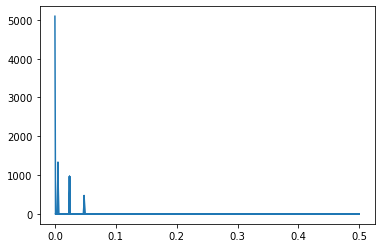

In [94]:
# maintenant on affiche
plt.plot(np.abs(freq), np.abs(fourier))

In [95]:
# on voit clairement que le spectre est nettoyé -> il n'y a plus ou moins de bruit dedans
# dernière étape -> transformée de fourier inverse
# ifft -> inverse
filtered_signal = fftpack.ifft(fourier)

C:\Users\Geoffrey\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


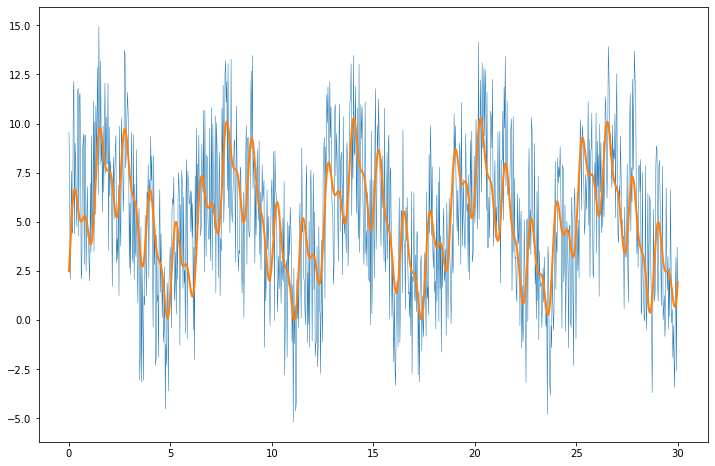

In [99]:
plt.figure(figsize=(12, 8))
# signal du début rempli de bruit
plt.plot(x, y, lw=0.5)
# signal filtré en orange
plt.plot(x, filtered_signal, lw=2)
plt.show()

Traitement du signal -> traitement d'image -> nd image

In [100]:
# scipy propose le module nd image
# on va voir scipy morphology

In [101]:
from scipy import ndimage

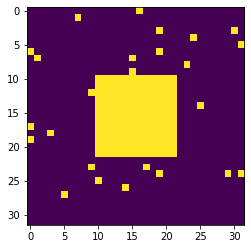

In [104]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

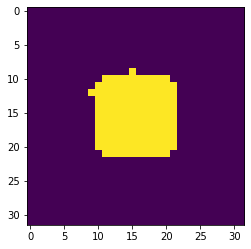

In [106]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

In [107]:
# on a supprimer les artefacts mais on a perdu de l'info comme dans les coins

Application traitement d'image

(507, 537, 3)

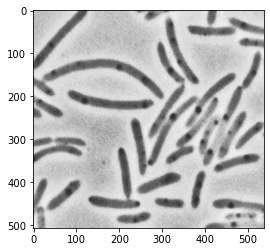

In [109]:
image = plt.imread('bacteria.png')
plt.imshow(image)
image.shape

(507, 537)

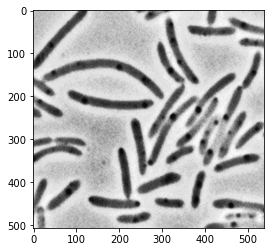

In [113]:
# on peut voir que l'image est en 3 dimenssions -> on va la reshape en 2 en faisant du subsetting
image = plt.imread('bacteria.png')
image = image[:,:,0]
plt.imshow(image, cmap='gray')
image.shape

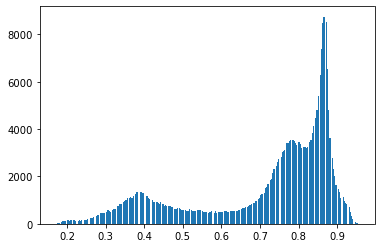

In [115]:
# il faut extraire les bactéries de l'arrière plan -> avec du boolean indexing dans numpy
# créer une copie de l'image
# image 8 bits -> 2**8 = 256 -> (0, 255)
image_2 = np.copy(image)
# on va applatire cette image avec la fonction ravel pour en faire un histogramme
plt.hist(image_2.ravel(), bins=255)
plt.show()

In [116]:
# avec cet histo on peut vraiment distinguer 3 nuances et donc trois groupes d'éléments couleur, gris fonçé, claire et blanc
# le but  étant d'extraire les bactérie de l'arriere plan, c'est à dire les éléments les plus sombre pique de 0.3 à 0.5
# faisons du booléen indexing
image = image<0.5
image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

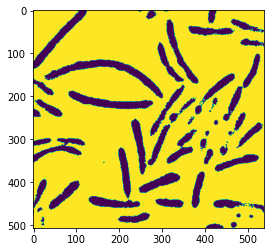

In [118]:
# on obtient un masque -> on peut s'en servir comme d'une image lui même
# on aura juste une image binaire
image = image<0.5
plt.imshow(image)

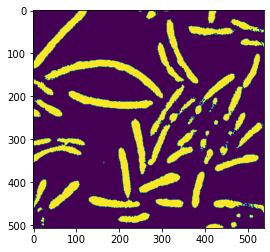

In [119]:
# essayons avec 0.6
image = image<0.6
plt.imshow(image)

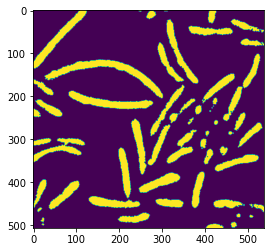

In [120]:
# maintenant on a quelques petits artefacts qui apparaissent
# on va copier coller le code d'avant pour faire ouverture d'image
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [121]:
# Maintenant on va utiliser la fct label dans ndimage pour segmenter cette image et mettre une étiquette sur chaque bactérie
#cette fct label retourne 2 variables -> 1) image sur laquelle on met une étiquette sur chaque bactéries qu'on peut voir
# -> 2) le nombre d'étiquette qu'on a pu placer sur cette image
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

65


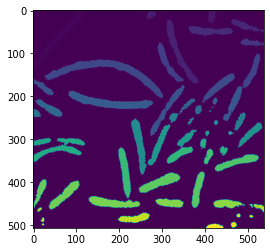

In [122]:
# 65 éléments identifiés
# pour les visualiser
plt.imshow(label_image)

In [123]:
# La fct sum() dans ndimage va nous permettre de compter tous les pixels qu'il y a dans chaque groupe
# et nous donner par exemple une taille qui sera une taille relative de nos bactéries
sizes = ndimage.sum(open_x, label_image, range(n_labels))

In [124]:
sizes

array([   0., 2931.,   23.,   26.,  442.,  298., 2277.,  779., 1466.,
         37.,  542.,   27., 1380., 1112., 4877., 1357.,  640., 1576.,
       1126., 3347.,  123.,  357.,  950.,  248.,    5.,    5.,  251.,
         12.,  512.,  300.,    5.,   93., 2025.,   80.,  935., 1333.,
        668.,   79.,   66.,  459., 2120.,  238.,  255.,  993., 1795.,
          8.,  416., 1548., 1324., 1890.,  761., 1554., 1943.,  998.,
        985.,   11.,   36.,  227.,   66., 1039.,   66.,   44.,   56.,
        139.,   19.])

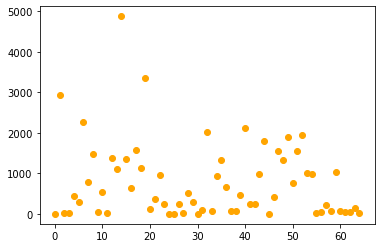

In [125]:
# sizes est un tableau numpy qui comprends 65 éléments
# et on a la taille de chaque éléments qu'il y a sur notre photo
# on peut avec matplotlib afficher toutes les tailles à l'écran
plt.scatter(range(n_labels), sizes, c='orange')

Nous voila avec un dataset
on pourrait faire des moyennes, ou autres stat, écarttype ...